<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.




In [281]:
print('Loading...')
#Manipulate
import pandas as pd # To load and manipulate data
import numpy as np # to calculate statistics (mean, standart desviation, etc..)

#Visualize
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#Model
from sklearn.linear_model import LinearRegression

#Evaluate
from sklearn.metrics import r2_score, mean_squared_error

#Regularization
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix

#Ignoring Deprecation Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

print('...Done')

Loading...
...Done


 ## MODEL IMPORTING (DATASET)

In [282]:
# Import dataset
df = pd.read_csv("Walmart_Store_sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


## EXPLORING DATASET

In [283]:
display(f"Number of rows: {df.shape[0]}  Number of columns: {df.shape[1]}")
# List Comprehension
display([col for col in df.columns])
summary_table = pd.DataFrame({
    # 'is_null_value': df.isnull().any(),
    'sum_null_value': round(df.isnull().sum()),
    'proporcion_null_value': (df.isnull().sum()/df.shape[0])*100,
    'count_values': df.count(),
    # 'unique': {print(f'{len(df.groupby(col).Name.nunique())}') for col in df},
    'type': df.dtypes,
    'mean': df.mean(),
    'max': df.max(),
    'min': df.min(),
})
summary_table

'Number of rows: 150  Number of columns: 8'

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

C:\Users\javie\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\javie\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\javie\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,sum_null_value,proporcion_null_value,count_values,type,mean,max,min
CPI,12,8.000000,138,float64,1.798985e+02,2.269688e+02,126.111903
Date,18,12.000000,132,object,NaN,NaN,NaN
Fuel_Price,14,9.333333,136,float64,3.320853e+00,4.193000e+00,2.514000
Holiday_Flag,12,8.000000,138,float64,7.971014e-02,1.000000e+00,0.000000
Store,0,0.000000,150,float64,9.866667e+00,2.000000e+01,1.000000
Temperature,18,12.000000,132,float64,6.139811e+01,9.165000e+01,18.790000
Unemployment,15,10.000000,135,float64,7.598430e+00,1.431300e+01,5.143000
Weekly_Sales,14,9.333333,136,float64,1.249536e+06,2.771397e+06,268929.030000


In [284]:
unique = {print(f'{col} : {len(df.groupby(col).nunique())} : {df[col].dtypes}') for col in df}

Store : 20 : float64
Date : 85 : object
Weekly_Sales : 136 : float64
Holiday_Flag : 2 : float64
Temperature : 130 : float64
Fuel_Price : 120 : float64
CPI : 135 : float64
Unemployment : 104 : float64


 ## PREPROCESSING - PANDAS 🐼🐼



### DROP LINES

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !

 👉 Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 

In [285]:
df.shape

(150, 8)

In [286]:
df_clean = df.dropna(axis=0, how='any', subset=['Weekly_Sales', 'Date'])
# df_clean = df[df['Weekly_Sales'].notna()]
df_clean = df_clean.reset_index(drop=True)
df_clean


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
3,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
4,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
...,...,...,...,...,...,...,...,...
113,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
114,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
115,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
116,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


### CHANGE DATE

**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

In [287]:
df_clean = df_clean.copy() #Deep copy

In [288]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%d-%m-%Y')
df_clean['Date']

0     2011-02-18
1     2011-03-25
2     2010-05-28
3     2010-05-28
4     2011-06-03
         ...    
113   2012-10-19
114   2010-06-18
115   2010-06-11
116   2011-08-12
117   2012-04-20
Name: Date, Length: 118, dtype: datetime64[ns]

In [289]:
type(df_clean['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [290]:
display(df_clean['Date'][0].year)
display(df_clean['Date'][0].month)
display(df_clean['Date'][0].day)
display(df_clean['Date'][2].weekday()) #Monday is 0 and Sunday is 6, so 4 is Friday.

2011

2

18

4

In [291]:
list_year = []
list_month = []
list_day = []
# list_weekday = []
#Extract the Year
for i in range(df_clean.shape[0]):
    list_year.append(df_clean['Date'][i].year)
display(list_year[0])
df_clean['Year'] = list_year
#Extract the Month
for i in range(df_clean.shape[0]):
    list_month.append(df_clean['Date'][i].month)
display(list_month[0])
df_clean['Month'] = list_month
#Extract the day
for i in range(df_clean.shape[0]):
    list_day.append(df_clean['Date'][i].day)
display(list_day[0])
df_clean['Day'] = list_day
#Extract the day of the week
# for i in range(df_clean.shape[0]):
#     list_weekday.append(df_clean['Date'][i].weekday())
# display(list_weekday) # all of them are Friday; so nothing interesting... we will not have into account this data.

2011

2

18

In [292]:
df_clean.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25
2,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28
3,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28
4,15.0,2011-06-03,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,6,3


In [293]:
px.scatter(data_frame=df_clean, x='Temperature', y='Weekly_Sales')

In [294]:
px.scatter(data_frame=df_clean, x='Fuel_Price', y='Weekly_Sales')

In [295]:
px.scatter(data_frame=df_clean, x='CPI', y='Weekly_Sales')

In [296]:
px.scatter(data_frame=df_clean, x='Unemployment', y='Weekly_Sales')

In [297]:
px.scatter(data_frame=df_clean, x='Holiday_Flag', y='Weekly_Sales')

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*

## Measuring the center of a distribution

There are three ways to measure the centre of a distribution in statistics: mean, median and mode.

### Mean (or Average)

The mean is the sum of all the measurements in your sample divided by the total number of individuals. The formula is as follows:

$$
\bar{X} = \frac{\sum_{i=0}^{n}X_{i}}{n}
$$

In [298]:
cols = ['Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']
for i in df[cols]:
    print(df[i].mean())

61.398106060606054
3.320852941176469
179.89850871739125
7.59842962962963


## Measure of Variation


### Standard Deviation

A value that is used much more is the standard deviation. It allows us to know how much the values in our sample deviate from the mean. Here is the formula:

$$
 \sigma = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}}
$$

Although standard deviations are sensitive to statistical outliers(i.e. exceptionally large or small numbers), they are not as affected as intervals. The larger your database, the less your results will be affected by these extreme values. It is still recommended to look at all points that are abnormally far from "normal" values and remove them from your sample because you know that they only bias your calculations.

Standard deviations can be calculated on any distribution. Through statistical experience, mathematicians have seen that, empirically, 68% of the values in a sample are often located one standard deviation from the mean. 95% of the values are located two standard deviations from the mean and 99.7% of the values in your sample are located three standard deviations from the mean. Nothing has been proven but this is what we observe in statistical experiments.

![](https://essentials-assets.s3.eu-west-3.amazonaws.com/M03-Python_programming_and_statistics/D01-Introduction_to_python_and_statistics/three_sigma_rule.png)

Todas las variables que esten fuera del rango $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$ seran eliminadas.

* 1 sigma = 68%
* 2 sigma = 95%
* 3 sigma = 99.7%

In [299]:
cols = ['Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']
for i in df[cols]:
    print('Mean:')
    display(df[i].mean())
    print('Standart Desviation:')
    display(df[i].std())

Mean:


61.398106060606054

Standart Desviation:


18.37890061969609

Mean:


3.320852941176469

Standart Desviation:


0.47814903192626695

Mean:


179.89850871739125

Standart Desviation:


40.27495629088349

Mean:


7.59842962962963

Standart Desviation:


1.5771725009088247

Confidence Interval for the temperature --> $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$

In [300]:
cols = ['Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']

In [301]:
CI_Temp =  61.39 - 3*18.37, 61.39 + 3*18.37
CI_Fuel =  3.32 - 3*0.47, 3.32 + 3*0.47
CI_CPI =  179.89 - 3*40.27, 179.89 + 3*40.27
CI_Unem =  7.59 - 3*1.57, 7.59 + 3*1.57
display(CI_Temp)
display(CI_Fuel)
display(CI_CPI)
display(CI_Unem)

(6.280000000000001, 116.5)

(1.91, 4.7299999999999995)

(59.079999999999984, 300.7)

(2.88, 12.3)

In [302]:
df_clean.shape

(118, 11)

In [303]:
df_mask_temp = df_clean[(df_clean['Temperature'] >= 6.28) & (df_clean['Temperature'] < 116.5)]
df_mask_Fuel = df_mask_temp[(df_mask_temp['Fuel_Price'] >= 1.91) & (df_mask_temp['Fuel_Price'] < 4.72)]
df_mask_CPI = df_mask_Fuel[(df_mask_Fuel['CPI'] >= 59.07) & (df_mask_Fuel['CPI'] < 300.7)]
df_mask_Unem = df_mask_CPI[(df_mask_CPI['Unemployment'] >= 2.88) & (df_mask_CPI['Unemployment'] < 12.3)]
display(df_mask_temp.shape)
display(df_mask_Fuel.shape)
display(df_mask_CPI.shape)
display(df_mask_Unem.shape)

(107, 11)

(96, 11)

(91, 11)

(80, 11)

In [304]:
df_drop_date = df_mask_Unem.drop('Date', axis=1)

In [305]:
df_clean_final = df_drop_date

 ### DROP COLUMNS

🔴 We will keep all the columns.


### FEATURES AND TARGET

In [306]:
type(df_clean_final)

pandas.core.frame.DataFrame

In [307]:
df_clean_final.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'Month', 'Day'],
      dtype='object')

In [308]:
df_clean_final.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25
2,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28
4,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,6,3
5,20.0,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,2,3


In [309]:
X = df_clean_final.loc[:,('Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day')]
y = df_clean_final.loc[:, 'Weekly_Sales']
print(X.shape)
print(y.shape)

(80, 9)
(80,)


In [310]:
# X = df.loc[:,df.columns != 'column']
# y = df.loc[:, 'column']

In [311]:
corr = X.corr()
mask = (corr.abs() > 0.9) & (corr < 1.0)
high_corr = corr[mask]
high_corr.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday_Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
corr = X.corr()
mask = (corr.abs() > 0.9) & (corr.abs() < 1.0) # El 100% son los valores iguales, es decir la digonal.
mask.head()
~corr[mask].any().head() # las columns correlacionadas, es decir con True son las que queremos eliminar.
# el signo viguilla, cambia los valores por el contrario.
X_clean = X[corr.columns[~corr[mask].any()]]
X_clean

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,6.0,NaN,59.61,3.045,214.777523,6.858,2011,2,18
1,13.0,0.0,42.38,3.435,128.616064,7.470,2011,3,25
2,6.0,0.0,78.89,2.759,212.412888,7.092,2010,5,28
4,15.0,0.0,69.80,4.069,134.855161,7.658,2011,6,3
5,20.0,0.0,39.93,3.617,213.023622,6.961,2012,2,3
...,...,...,...,...,...,...,...,...,...
109,7.0,0.0,50.60,3.804,197.588605,8.090,2012,5,25
112,3.0,0.0,78.53,2.705,214.495838,7.343,2010,6,4
113,3.0,0.0,73.44,3.594,226.968844,6.034,2012,10,19
114,14.0,0.0,72.62,2.780,182.442420,8.899,2010,6,18


In [313]:
import seaborn as sns

<AxesSubplot:>

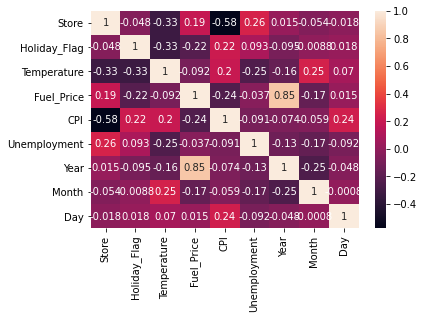

In [314]:
cor = X_clean.corr()
sns.heatmap(cor, annot=True)

 ## PREPROCESSING - SCIKIT-LEARN 🔬🔬


We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

🖐 FEATURES (X)--> We have both, categorical variables and Numerical ones.

**👉 Categorical variables : 'Stored', 'Holiday_Flag'.**

**👉 Numerical variables : 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek'**

In this dataset, we have both types of variables. It will thus be necessary to create a numeric_transformer that will wrap together all preprocessing steps for numerical variables (it will call the StandardScaler class and replace missing values using the SimpleImputer class) and a categorical_transformer to wrap together all the preprocessing steps for categorical variables (it will call the OneHotEncoder class and replace missing values using the SimpleImputer class).

🖐 TARGET (Y)--> It´s a numerical variable.

**👉 Numerical variables : 'Weekly_Sales'**



 ### TRAIN TEST SPLIT 🔬🔬

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.head(), y_train.head())
print(X_test.head(), y_test.head())

    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
40    1.0           NaN        91.65       3.684  215.544618         7.962   
48    8.0           0.0        74.92       2.619  214.936279         6.315   
68    2.0           0.0        44.69       2.976  211.064888         8.028   
36    1.0           1.0        38.51       2.548  211.242170         8.106   
35    7.0           NaN        57.60       3.485  194.379637         8.622   

    Year  Month  Day  
40  2011      8    5  
48  2010      8   27  
68  2011      1    7  
36  2010      2   12  
35  2011      8   26   40    1624383.75
48     888816.78
68    1758050.79
36    1641957.44
35     629994.47
Name: Weekly_Sales, dtype: float64
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
8     18.0           0.0        52.02       2.878  132.763355         9.331   
22    16.0           0.0        43.95       3.828  192.831317         6.339   
45    14.0           NaN        41.7

### PIPELINE NUMERIC FEATURES

In [316]:
print(X_train.shape)
print(type(X_train))

(64, 9)
<class 'pandas.core.frame.DataFrame'>


In [317]:
X_train['Store'].isnull().value_counts()

False    64
Name: Store, dtype: int64

In [318]:
X_train['Holiday_Flag'].isnull().value_counts()

False    58
True      6
Name: Holiday_Flag, dtype: int64

In [319]:
# Create pipeline for numeric features

# numeric_features = [2,3,4,5,6,7,8] # Positions of numeric columns in X_train/X_test
numeric_features = [2,3,4,5] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

### PIPELINE CATEGORICAL FEATURES

In [320]:
# Create pipeline for categorical features
categorical_features = [0,1] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by the mean
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

### PIPELINE GLOBAL

In [321]:
#Reminder: you need to call .fit_transform() on X_train and only .transform() on X_test, to ensure that the latter gets the same transformations as X_train.
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train)
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train)
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test)
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print(X_test)
print()

Performing preprocessings on train set...
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
40    1.0           NaN        91.65       3.684  215.544618         7.962   
48    8.0           0.0        74.92       2.619  214.936279         6.315   
68    2.0           0.0        44.69       2.976  211.064888         8.028   
36    1.0           1.0        38.51       2.548  211.242170         8.106   
35    7.0           NaN        57.60       3.485  194.379637         8.622   
..    ...           ...          ...         ...         ...           ...   
82   19.0           0.0        72.83       2.932  132.598387         8.099   
37    2.0           0.0        54.63       3.555  220.275944         7.057   
90   11.0           1.0        69.90       2.735  215.061403         7.564   
10    1.0           0.0        64.74       3.734  221.211813         7.348   
64   15.0           0.0        47.42       4.021  137.584387         7.943   

    Year  Month  Day 

### ENCODE TARGET VARIABLE Y

## MODEL TRAINING 🏃

In [322]:
# Train model - Machine Learning
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## PREDICTIONS 🔮

In [323]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = model.predict(X_train)
print("...Done.")
print(y_train_pred)
print()

Predictions on training set...
...Done.
[1493191.81807127  903678.23051284 1808718.71364045 1580127.57429174
  498169.8091938  1432997.8845204   823745.98309025  485095.41000006
  319060.40960787 1932734.16830823  496545.56317429  401463.26081291
 2014892.63979003 1919962.05197343  844614.85145836 1603135.70482301
 1921574.87173947 2095954.29980298  583371.99230156 2081686.11826137
 2012031.26736041 1430286.26044876  578867.23696201  501917.45682106
  406939.01791669  460507.88759744  489206.22733008 1373859.309656
  808865.43878759 1929781.29678255  314590.15302311  517958.11166615
 1882498.3122419   385072.56697556 1344104.84648026  610586.89858717
 2233697.59383456 2114755.77284021 1593941.01888933 1979704.70275877
  414966.5824476  1927571.63038843 1648228.73895568 1913872.49775795
  195110.71092069  488990.80485583  908047.4607055   417659.91480432
 1834006.35218122  838463.53545031  375030.74288032 2247909.43569734
  208973.60190608 1074078.99999956  556337.66253589 1556084.78945

In [324]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = model.predict(X_test)
print("...Done.")
print(y_test_pred)
print()

Predictions on test set...
...Done.
[1099037.98218639  405596.11047581 2013655.32843523 2276838.45043125
  482178.73111539 2238876.45395631 1332416.51053078 2009799.34594361
  851564.42707867  565247.22422873 1611715.11819744  539043.88306549
 1982398.4463943  1059431.43311261 1613926.71863436 1092338.22344369]



### PERFORMANCE 💯

In [325]:
# R^2 scores
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

R2 score on training set :  0.9811857065188934
R2 score on test set :  0.938439874387951


In [326]:
# mse scores
print("mse score on training set : ", mean_squared_error(y_train, y_train_pred))
print("mse score on test set : ", mean_squared_error(y_test, y_test_pred))

mse score on training set :  8780937799.636232
mse score on test set :  24813343055.98443


## Diagnosing under/over-fitting 🩺🩺
To detect underfitting or overfitting, the train/test (or train/validation) scores can be compared to each other :
* If $score(train) \sim score(test) \sim 0$ : the model is underfitting
* If $score(train) >> score(test)$ : the model is overfitting
* If $score(train) \sim score(test) >> 0$ : the model is just right !

In [327]:
Coefficients = pd.DataFrame(model.coef_, index=None)
Coefficients.abs().sort_values(by=0, ascending=False)
# Coefficients.abs().sort_values(by=0, ascending=False)

,0
6,1.729866e+06
12,1.469920e+06
14,1.462491e+06
7,1.409565e+06
5,1.329125e+06
11,1.234350e+06
17,9.264550e+05
15,9.154663e+05
20,8.971333e+05
10,8.799342e+05


**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

### FIGHT OVERFITTING

### Regularized linear regression : RIDGE 👮👮

In [328]:
ridge_regressor_small_alpha = Ridge(alpha = 10)
ridge_regressor_large_alpha = Ridge(alpha = 10000)

In [329]:
ridge_regressor_small_alpha.fit(X_train, y_train)
ridge_regressor_large_alpha.fit(X_train, y_train)

Ridge(alpha=10000)

In [330]:
print("Score on training: ")
print("Linear Regression score : {}".format(model.score(X_train, y_train)))
print("Ridge with small Alpha score : {}".format(ridge_regressor_small_alpha.score(X_train, y_train)))
print("Ridge with large Alpha score : {}".format(ridge_regressor_large_alpha.score(X_train,y_train)))

Score on training: 
Linear Regression score : 0.9811857065188934
Ridge with small Alpha score : 0.5308553395837554
Ridge with large Alpha score : 0.003383171885205205


In [331]:
print("Score on test: ")
print("Linear Regression score: {}".format(model.score(X_test, y_test)))
print("Ridge with small Alpha score: {}".format(ridge_regressor_small_alpha.score(X_test, y_test)))
print("Ridge with large Alpha score: {}".format(ridge_regressor_large_alpha.score(X_test,y_test)))

Score on test: 
Linear Regression score: 0.938439874387951
Ridge with small Alpha score: 0.43988176786300137
Ridge with large Alpha score: -0.036153026327411686


- $\alpha = 0 \implies R^2_{test} << R^2_{train}$ : without any regularization, the model is overfitting
- $\alpha = 10 \implies R^2_{test} << R^2_{train}$: with a small $\alpha$, the model is still overfitting
- $\alpha = 10000 \implies R^2_{test} \sim R^2_{train}$ but both low: with a high $\alpha$, the model is underfitting (the score deteriorated on the train set)

In [332]:
coef = pd.DataFrame()
# coef['features'] = X.columns
coef['coef_linear_regressor'] = model.coef_
coef['coef_ridge_small_alpha'] = ridge_regressor_small_alpha.coef_
coef['coef_ridge_large_alpha'] = ridge_regressor_large_alpha.coef_
coef

,coef_linear_regressor,coef_ridge_small_alpha,coef_ridge_large_alpha
0,-1.358143e+04,-10892.074996,-468.845428
1,-6.947938e+04,-20139.183069,181.672466
2,5.199010e+05,-199260.578003,-1835.673306
3,-5.196035e+04,44460.235298,325.726786
4,2.029665e+05,167777.268491,195.014135
5,-1.329125e+06,-279705.885091,-628.625549
6,1.729866e+06,200908.723921,327.847925
7,-1.409565e+06,-236538.269150,-450.816309
8,-5.032591e+04,120591.055557,119.801369
9,-7.299527e+05,-270919.209771,-395.509135


In [ ]:
# perf_lin = pd.DataFrame({"params": model.coef_, 
#                                        "model": "linear_regressor", 
#                                        "index": range(0, len(X.columns))})

# perf_ridge_large_alpha = pd.DataFrame({"params": ridge_regressor_large_alpha.coef_, 
#                                        "model": "ridge Alpha = 100", 
#                                        "index": range(0, len(X.columns))})

# perf_ridge_small_alpha = pd.DataFrame({"params": ridge_regressor_small_alpha.coef_, 
#                                        "model": "ridge Alpha = 0.01", 
#                                        "index": range(0, len(X.columns))})

# perf_compar = pd.concat([perf_ridge_large_alpha,perf_ridge_small_alpha,perf_lin])

# px.line(perf_compar, x = 'index', y = 'params', color = 'model')

### Find the optimal value for the hyper-parameter alpha using sklearn function GridSearchCV. Try values from 0 to 1000 with a step of 10, use a value of 10 as the "cv" parameter and a value of 1 for the "verbose" parameter.

In [334]:
params = {'alpha': np.arange(0,10000,100)} # determine the range of parameters to try
ridge = Ridge() # create an instance of the model

grid = GridSearchCV(ridge, params, cv = 10, verbose = 1)
grid_fit = grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [335]:
print("Optimal value for alpha : ", grid_fit.best_params_)

Optimal value for alpha :  {'alpha': 0}


In [336]:
print('Test score for the best model : ', grid_fit.best_estimator_.score(X_test,y_test))

Test score for the best model :  0.9313823029733626


In [337]:
scores = cross_val_score(grid_fit.best_estimator_, X_train, y_train, cv = 10)

print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.8572685442917628
The standard deviation is :  0.11210517843109521


When increasing the number of samples in the data, it seems that ridge is not better than the linear regression model anymore, the penalization does not work. What does this tell us ? When using a relatively small sample of data ridge was better than linear regression, meaning linear regression's variance was too high and its bias was too low to derve good results on the test set, therefore the penalized version, ridge, git us better results. This is linked to the fact that a smaller sample of data naturally has lower variance than a bigger sample, therefore a model with lower variance is needed.

When increasing the number of sample back to normal, we increase the variance in the data dramatically. This increase in variance within the data calls for a model with higher variance and lower bias, which explains why, when all samples are selected, the results of ridge are not as convincing anymore.

### Penalized Regression : LASSO 🤠🤠

In [338]:
lin = LinearRegression()
lasso1 = Lasso(alpha = 1)
lasso001 = Lasso(alpha = 0.01)
lasso00001 = Lasso(alpha = 0.0001)

In [339]:
lin.fit(X_train, y_train)
lasso1.fit(X_train, y_train)
lasso001.fit(X_train, y_train)
lasso00001.fit(X_train, y_train)

C:\Users\javie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 281509220479.48, tolerance: 2986984442.126739

C:\Users\javie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 282960063048.9348, tolerance: 2986984442.126739

C:\Users\javie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 282974362459.4147, tolerance: 2986984442.126739



Lasso(alpha=0.0001)

In [340]:
baseline_pred = [y_test.values.mean()]*len(y_test)
print("Train scores \n")
print("Score Baseline : {} \nScore Lin : {} \nScore Lasso1 : {} \nScore Lasso001 : {} \nScore Lasso00001 : {}".format(r2_score(y_test, baseline_pred),
lin.score(X_train, y_train),
lasso1.score(X_train, y_train),
lasso001.score(X_train, y_train),
lasso00001.score(X_train,y_train)))

Train scores 

Score Baseline : 0.0 
Score Lin : 0.9811857065188934 
Score Lasso1 : 0.9810506382239911 
Score Lasso001 : 0.9810528084621302 
Score Lasso00001 : 0.9810528299957495


In [341]:
baseline_pred = [y_test.values.mean()]*len(y_test)
print("Test scores \n")
print("Score Baseline : {} \nScore Lin : {} \nScore Lasso1 : {} \nScore Lasso001 : {} \nScore Lasso00001 : {}".format(r2_score(y_test, baseline_pred),
lin.score(X_test, y_test),
lasso1.score(X_test, y_test),
lasso001.score(X_test, y_test),
lasso00001.score(X_test,y_test)))

Test scores 

Score Baseline : 0.0 
Score Lin : 0.938439874387951 
Score Lasso1 : 0.9353344607775824 
Score Lasso001 : 0.9353437531957136 
Score Lasso00001 : 0.9353438452664398


In [342]:
print("Train MSE \n")

print("MSE Baseline : {} \nMSE Lin : {} \nMSE Lasso1 : {} \nMSE Lasso001 : {} \nMSE Lasso00001 : {}".format(mean_squared_error(y_test, baseline_pred),
mean_squared_error(y_train,lin.predict(X_train)),
mean_squared_error(y_train,lasso1.predict(X_train)),
mean_squared_error(y_train,lasso001.predict(X_train)),
mean_squared_error(y_train,lasso00001.predict(X_train))))

Train MSE 

MSE Baseline : 403074925680.9148 
MSE Lin : 8780937799.636232 
MSE Lasso1 : 8843976377.057762 
MSE Lasso001 : 8842963491.501942 
MSE Lasso00001 : 8842953441.4104


In [343]:
print("Test MSE \n")

print("MSE Baseline : {} \nMSE Lin : {} \nMSE Lasso1 : {} \nMSE Lasso001 : {} \nMSE Lasso00001 : {}".format(mean_squared_error(y_test, baseline_pred),
mean_squared_error(y_test,lin.predict(X_test)),
mean_squared_error(y_test,lasso1.predict(X_test)),
mean_squared_error(y_test,lasso001.predict(X_test)),
mean_squared_error(y_test,lasso00001.predict(X_test))))

Test MSE 

MSE Baseline : 403074925680.9148 
MSE Lin : 24813343055.98443 
MSE Lasso1 : 26065057416.192257 
MSE Lasso001 : 26061311875.444603 
MSE Lasso00001 : 26061274764.043514


In [344]:
print("Linear Regression \n Proportion of coefficients equal to zero")
print(np.sum(lin.coef_==0)/len(lin.coef_))
print("\n Distribution of coefficients \n")
px.histogram(lin.coef_)

Linear Regression 
 Proportion of coefficients equal to zero
0.0

 Distribution of coefficients 



In [345]:
print("Lasso 1 \n Proportion of coefficients equal to zero")
print(np.sum(lasso1.coef_==0)/len(lasso1.coef_))
print("\n Distribution of coefficients \n")
px.histogram(lasso1.coef_)

Lasso 1 
 Proportion of coefficients equal to zero
0.0

 Distribution of coefficients 



In [346]:
print("Lasso 0.01 \n Proportion of coefficients equal to zero")
print(np.sum(lasso001.coef_==0)/len(lasso001.coef_))
print("\n Distribution of coefficients \n")
px.histogram(lasso001.coef_)

Lasso 0.01 
 Proportion of coefficients equal to zero
0.0

 Distribution of coefficients 



In [347]:
print("Lasso 0.0001 \n Proportion of coefficients equal to zero")
print(np.sum(lasso00001.coef_==0)/len(lasso00001.coef_))
print("\n Distribution of coefficients \n")
px.histogram(lasso00001.coef_)

Lasso 0.0001 
 Proportion of coefficients equal to zero
0.0

 Distribution of coefficients 



In [348]:
params = {'alpha' : [10**(-a) for a in range(10)]}
lasso = Lasso()
grid = GridSearchCV(lasso,param_grid=params, cv = 10, verbose=1)

grid.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\javie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 216884427393.45557, tolerance: 2849280765.9626513

C:\Users\javie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 266444481451.97067, tolerance: 2556255725.480546

C:\Users\javie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 226318475788.0389, tolerance: 2600616847.214124

C:\Users\javie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 259493650083.02957, to

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08, 1e-09]},
             verbose=1)

In [349]:
grid.best_params_

{'alpha': 1}

### CONFUSION MATRIX

The confusion matrix is used to tell you how many predictions were classified correctly or incorrectly. You are looking at a regression model, which gives you a continous output (not classification). So when you run confusion_matrix(y_test, y_pred) it will throw the ValueError because it expected class predictions, not floating point numbers. Are you trying to predict classes, or really just a number output? If not, then you should not be using the confusion matrix.

In [ ]:
# confusion_matrix(y_test, grid.predict(X_test))